In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

data = load_diabetes()
features, target = data.data, data.target

train_X, test_X, train_y, test_y = train_test_split(
    features, target, test_size=0.2, random_state=7
)


In [2]:
regressors = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "DecisionTree": DecisionTreeRegressor(random_state=7),
    "RandomForest": RandomForestRegressor(random_state=7),
    "SVR": SVR()
}

mse_results = {}
mae_results = {}

# Entrenar y evaluar
for label, reg in regressors.items():
    reg.fit(train_X, train_y)
    preds = reg.predict(test_X)

    mse_results[label] = mean_squared_error(test_y, preds)
    mae_results[label] = mean_absolute_error(test_y, preds)

# Mostrar resultados
print("=== Mean Squared Error ===")
for k, v in mse_results.items():
    print(f"{k}: {v:.3f}")

print("\n=== Mean Absolute Error ===")
for k, v in mae_results.items():
    print(f"{k}: {v:.3f}")

=== Mean Squared Error ===
Linear: 2966.050
Ridge: 2981.358
Lasso: 3290.731
DecisionTree: 4169.573
RandomForest: 2962.762
SVR: 4061.747

=== Mean Absolute Error ===
Linear: 42.098
Ridge: 45.407
Lasso: 48.671
DecisionTree: 51.079
RandomForest: 43.501
SVR: 52.893


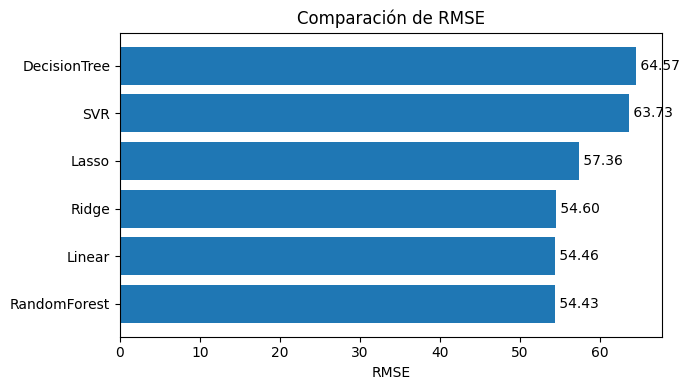

In [3]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_results = {}
for name, reg in regressors.items():
    reg.fit(train_X, train_y)
    p = reg.predict(test_X)
    rmse_results[name] = rmse(test_y, p)

# Ordenar y graficar en horizontal
pairs = sorted(rmse_results.items(), key=lambda kv: kv[1])
labels, values = zip(*pairs)

plt.figure(figsize=(7, 4))
plt.barh(labels, values)
for i, v in enumerate(values):
    plt.text(v, i, f" {v:.2f}", va="center")
plt.xlabel("RMSE")
plt.title("Comparación de RMSE")
plt.tight_layout()
plt.show()

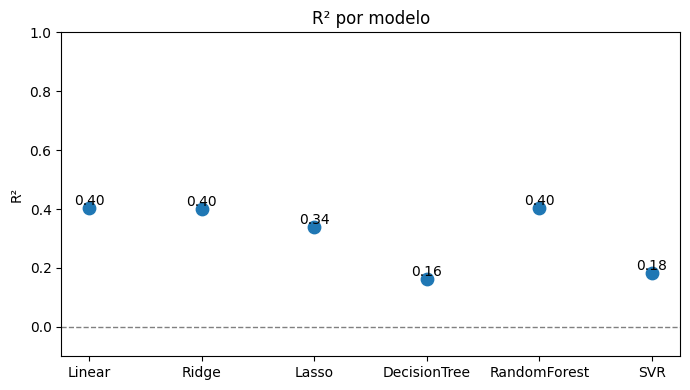

In [4]:
r2_results = {}
for name, reg in regressors.items():
    reg.fit(train_X, train_y)
    r2_results[name] = reg.score(test_X, test_y)

labels = list(r2_results.keys())
scores = [r2_results[k] for k in labels]

plt.figure(figsize=(7, 4))
plt.scatter(labels, scores, s=80)
plt.axhline(0.0, color="gray", linestyle="--", linewidth=1)
for x, y in zip(labels, scores):
    plt.text(x, y, f"{y:.2f}", ha="center", va="bottom")
plt.ylabel("R²")
plt.title("R² por modelo")
plt.ylim(min(-0.1, min(scores) - 0.05), 1.0)
plt.tight_layout()
plt.show()

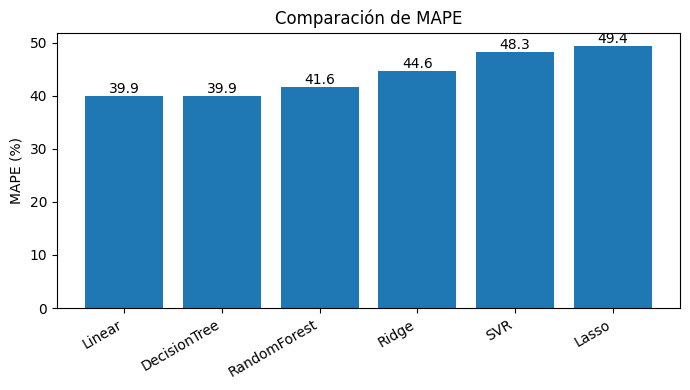

In [5]:
def mape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    nz = y_true != 0
    return np.mean(np.abs((y_true[nz] - y_pred[nz]) / y_true[nz])) * 100.0

mape_results = {}
for name, reg in regressors.items():
    reg.fit(train_X, train_y)
    yhat = reg.predict(test_X)
    mape_results[name] = mape(test_y, yhat)

labels, vals = zip(*sorted(mape_results.items(), key=lambda kv: kv[1]))
plt.figure(figsize=(7, 4))
plt.bar(labels, vals)
plt.ylabel("MAPE (%)")
plt.title("Comparación de MAPE")
plt.xticks(rotation=30, ha="right")
for x, v in enumerate(vals):
    plt.text(x, v, f"{v:.1f}", ha="center", va="bottom")
plt.tight_layout()
plt.show()


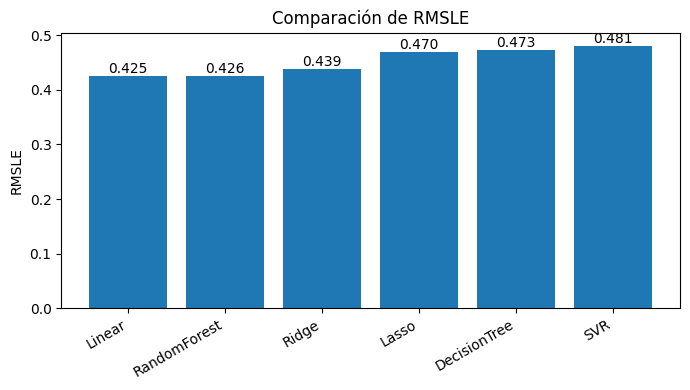

In [6]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-10, np.inf)
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

rmsle_results = {}
for name, reg in regressors.items():
    reg.fit(train_X, train_y)
    yhat = reg.predict(test_X)
    rmsle_results[name] = rmsle(test_y, yhat)

labels, vals = zip(*sorted(rmsle_results.items(), key=lambda kv: kv[1]))
plt.figure(figsize=(7, 4))
plt.bar(labels, vals)
plt.ylabel("RMSLE")
plt.title("Comparación de RMSLE")
plt.xticks(rotation=30, ha="right")
for x, v in enumerate(vals):
    plt.text(x, v, f"{v:.3f}", ha="center", va="bottom")
plt.tight_layout()
plt.show()
